In [51]:
import pandas as pd

# Load the data
data = pd.read_csv('immoweb_raw_vf.csv')
data = data.drop_duplicates()
# Fill missing values with "None"
data = data.fillna("None")

# Save the cleaned data
total= data.count()
print(total)
# Filter out rows where the 'Price' column doesn't contain 'None'
data = data[data['Price'] != 'None']
data = data[data['Habitable_Surface'] != 'None']


ID                          59625
Price                       59625
region                      59625
provience                   59625
District                    59625
Postal_Code                 59625
Locality                    59625
Latitude                    59625
Longitude                   59625
Construction_Year           59625
Condition                   59625
Type                        59625
Subtype                     59625
Bedroom_Count               59625
Land_Surface                59625
Kitchen_Type                59625
Sale_Type                   59625
Furnished                   59625
Fireplace_Exists            59625
Has_Terrace                 59625
Terrace_Surface             59625
Has_Garden                  59625
Garden_Surface              59625
Habitable_Surface           59625
Facade_Count                59625
Swimming_Pool               59625
Indoor_Parking              59625
Outdoor_Parking             59625
Heating_Type                59625
Energy_Consump

In [52]:
# Exclude the first column from duplicate check
columns_to_check = data.columns[1:]

# Find duplicates in rows except the first column
duplicates = data.duplicated(subset=columns_to_check, keep='first')

# Filter the dataset to show only the duplicated rows (excluding the first occurrence)
duplicated_rows = data[duplicates]
duplicated_rows_count = duplicated_rows.count()
print("Number of duplicated rows found:", duplicated_rows_count)

# Remove duplicate rows based on specified columns
data = data.drop_duplicates(subset=columns_to_check, keep='first')

# Display the cleaned dataset
print("Cleaned Dataset (excluding duplicate rows):")
data.count()

Number of duplicated rows found: ID                          950
Price                       950
region                      950
provience                   950
District                    950
Postal_Code                 950
Locality                    950
Latitude                    950
Longitude                   950
Construction_Year           950
Condition                   950
Type                        950
Subtype                     950
Bedroom_Count               950
Land_Surface                950
Kitchen_Type                950
Sale_Type                   950
Furnished                   950
Fireplace_Exists            950
Has_Terrace                 950
Terrace_Surface             950
Has_Garden                  950
Garden_Surface              950
Habitable_Surface           950
Facade_Count                950
Swimming_Pool               950
Indoor_Parking              950
Outdoor_Parking             950
Heating_Type                950
Energy_Consumption_Level    950
EPC    

ID                          49681
Price                       49681
region                      49681
provience                   49681
District                    49681
Postal_Code                 49681
Locality                    49681
Latitude                    49681
Longitude                   49681
Construction_Year           49681
Condition                   49681
Type                        49681
Subtype                     49681
Bedroom_Count               49681
Land_Surface                49681
Kitchen_Type                49681
Sale_Type                   49681
Furnished                   49681
Fireplace_Exists            49681
Has_Terrace                 49681
Terrace_Surface             49681
Has_Garden                  49681
Garden_Surface              49681
Habitable_Surface           49681
Facade_Count                49681
Swimming_Pool               49681
Indoor_Parking              49681
Outdoor_Parking             49681
Heating_Type                49681
Energy_Consump

filled_rows = data[data.notna().all(axis=1)]

# Print the rows
print(filled_rows)
filled_rows.count()

In [53]:
columns_to_convert = ['Price','Construction_Year', 'Bedroom_Count', 'Terrace_Surface','Garden_Surface', 'Land_Surface', 'Habitable_Surface', 'Facade_Count']

# Convert specified columns to numeric, coercing errors to NaN
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')


placeholder_value = 0  
data['Facade_Count'] = data['Facade_Count'].fillna(placeholder_value)
data['Construction_Year'] = data['Construction_Year'].fillna(placeholder_value)
data['Bedroom_Count'] = data['Bedroom_Count'].fillna(placeholder_value)
data['Terrace_Surface'] = data['Terrace_Surface'].fillna(placeholder_value)
data['Garden_Surface'] = data['Garden_Surface'].fillna(placeholder_value)
data['Land_Surface'] = data['Land_Surface'].fillna(placeholder_value)
data['Habitable_Surface'] = data['Habitable_Surface'].fillna(placeholder_value)




# Convert columns to integer or float as needed
data[columns_to_convert] = data[columns_to_convert].astype(int)
#data['Bedroom Count'] = data['Bedroom Count'].astype(int)

In [54]:
data

,ID,Price,region,provience,District,Postal_Code,Locality,Latitude,Longitude,Construction_Year,...,Habitable_Surface,Facade_Count,Swimming_Pool,Indoor_Parking,Outdoor_Parking,Heating_Type,Energy_Consumption_Level,EPC,Double_glazing,Cadastral_income
0,11141733,150000,Wallonie,Hainaut,Mons,7041,Givry,50.377507,4.033881,0,...,98,2,None,1.0,None,FUELOIL,498.0,F,1.0,384.0
2,11140961,360000,Flanders,Flemish Brabant,Halle-Vilvoorde,1670,Pepingen,50.759547,4.153168,1960,...,91,4,0.0,1.0,5.0,FUELOIL,931.0,F,None,831.0
3,11140482,339000,Flanders,West Flanders,Oostend,8400,Oostende,51.219233,2.907262,0,...,173,0,None,None,None,None,None,None,None,None
4,11141197,430000,Wallonie,Hainaut,Charleroi,6200,Châtelet,50.393684,4.539399,1995,...,280,4,1.0,2.0,2.0,FUELOIL,268.0,D,1.0,1600.0
5,11140411,475000,Wallonie,Walloon Brabant,Nivelles,1350,Orp-Jauche,50.68298,4.9547,2021,...,151,4,0.0,1.0,2.0,None,77.0,A,1.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59620,10962580,250000,Flanders,Antwerp,Antwerp,2170,Antwerp,51.243581,4.448077,0,...,94,0,None,None,None,None,None,None,None,None
59621,10962582,255000,Flanders,Antwerp,Antwerp,2170,Antwerp,51.243497,4.448007,0,...,95,0,None,None,None,None,None,None,None,None
59622,10962581,245000,Flanders,Antwerp,Antwerp,2170,Antwerp,51.243497,4.448007,0,...,90,0,None,None,None,None,None,None,None,None
59623,11007835,255000,Flanders,Antwerp,Antwerp,2170,Merksem,51.247492,4.432131,1968,...,82,2,0.0,None,4.0,GAS,154.0,B,None,0.0


Data Analysis


Data Analysis


In [55]:
print(data.describe())  # Summary statistics
print(data.info())      # Information about the dataset

                 ID         Price   Postal_Code  Construction_Year  \
count  4.968100e+04  4.968100e+04  49681.000000       49681.000000   
mean   1.094433e+07  4.671641e+05   4746.261790         593.961394   
std    2.762404e+05  5.437562e+05   3075.205079         903.474755   
min    1.882546e+06  2.500000e+03   1000.000000           0.000000   
25%    1.089529e+07  2.150000e+05   2000.000000           0.000000   
50%    1.103436e+07  3.290000e+05   4000.000000           0.000000   
75%    1.110367e+07  5.400000e+05   8300.000000        1930.000000   
max    1.114192e+07  1.500000e+07   9991.000000        8071.000000   

       Bedroom_Count   Land_Surface  Fireplace_Exists  Terrace_Surface  \
count   49681.000000   49681.000000      49681.000000     49681.000000   
mean        2.919003     509.027214          0.199875         9.865582   
std         1.950402    7335.119744          0.399910        37.296114   
min         0.000000       0.000000          0.000000         0.000000   

Convert to int

In [56]:
data['Facade_Count']

0        2
2        4
3        0
4        4
5        4
        ..
59620    0
59621    0
59622    0
59623    2
59624    0
Name: Facade_Count, Length: 49681, dtype: int32

In [57]:
print(data.info())      # Information about the dataset


<class 'pandas.core.frame.DataFrame'>
Index: 49681 entries, 0 to 59624
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        49681 non-null  int64 
 1   Price                     49681 non-null  int32 
 2   region                    49681 non-null  object
 3   provience                 49681 non-null  object
 4   District                  49681 non-null  object
 5   Postal_Code               49681 non-null  int64 
 6   Locality                  49681 non-null  object
 7   Latitude                  49681 non-null  object
 8   Longitude                 49681 non-null  object
 9   Construction_Year         49681 non-null  int32 
 10  Condition                 49681 non-null  object
 11  Type                      49681 non-null  object
 12  Subtype                   49681 non-null  object
 13  Bedroom_Count             49681 non-null  int32 
 14  Land_Surface              4

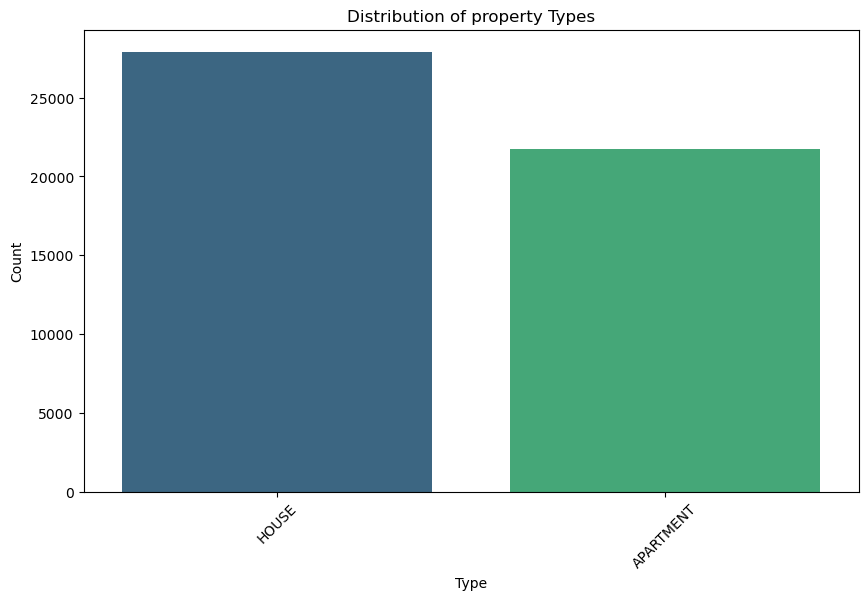

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

type_counts = data['Type'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Distribution of property Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [59]:
apartment_data = data[data['Type'] == 'APARTMENT']
houses_data = data[data['Type'] == 'HOUSE']
#other_data = data[~data['Type'].isin(['APARTMENT', 'HOUSE'])]
apartment_data




,ID,Price,region,provience,District,Postal_Code,Locality,Latitude,Longitude,Construction_Year,...,Habitable_Surface,Facade_Count,Swimming_Pool,Indoor_Parking,Outdoor_Parking,Heating_Type,Energy_Consumption_Level,EPC,Double_glazing,Cadastral_income
32992,10831804,259000,Flanders,West Flanders,Oostend,8400,Oostende,51.228392,2.921042,0,...,85,0,None,None,None,None,None,None,None,None
32993,11141730,159000,Wallonie,Liège,Liège,4020,Liege,50.640179,5.588265,0,...,90,0,None,None,None,None,None,None,None,None
32994,11140517,330000,Brussels,Brussels,Brussels,1040,Etterbeek,None,None,0,...,80,0,0.0,None,None,None,None,None,None,None
32996,11140128,255000,Brussels,Brussels,Brussels,1140,Evere,None,None,0,...,85,0,None,None,None,None,None,None,None,None
32997,11140127,349000,Brussels,Brussels,Brussels,1160,Woluwé Saint Pierre,None,None,0,...,82,0,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59620,10962580,250000,Flanders,Antwerp,Antwerp,2170,Antwerp,51.243581,4.448077,0,...,94,0,None,None,None,None,None,None,None,None
59621,10962582,255000,Flanders,Antwerp,Antwerp,2170,Antwerp,51.243497,4.448007,0,...,95,0,None,None,None,None,None,None,None,None
59622,10962581,245000,Flanders,Antwerp,Antwerp,2170,Antwerp,51.243497,4.448007,0,...,90,0,None,None,None,None,None,None,None,None
59623,11007835,255000,Flanders,Antwerp,Antwerp,2170,Merksem,51.247492,4.432131,1968,...,82,2,0.0,None,4.0,GAS,154.0,B,None,0.0


In [60]:

# Save the cleaned dataset
apartment_data.to_csv("immo_appartment_raw_vf.csv", index=False)
houses_data.to_csv("immo_house_raw_vf.csv", index=False)

In [61]:
import pandas as pd

# Load the data
data_appr = pd.read_csv('immo_appartment_raw_vf.csv')

# Columns to fill with zero
columns_to_fill_zero = ['Has_Terrace', 'Has_Garden', 'Swimming_Pool', 'Indoor_Parking', 'Outdoor_Parking']
data_appr[columns_to_fill_zero] = data_appr[columns_to_fill_zero].fillna(0)

# Columns to fill with 'no information'
columns_to_fill_no_information = ['Condition', 'Kitchen_Type', 'Heating_Type', 'Energy_Consumption_Level', 'EPC', 'Double_glazing']
data_appr[columns_to_fill_no_information] = data_appr[columns_to_fill_no_information].fillna('no information')

# Fill 'Sale Type' with 'Normal_sale'
data_appr['Sale_Type'] = data_appr['Sale_Type'].fillna('Normal_sale')

# Drop specified columns permanently
data_appr.drop(['Cadastral_income', 'Land_Surface','Double_glazing', 'Garden_Surface'], axis=1, inplace=True)
#data_appr['Double_glazing'] = data_appr['Double_glazing'].map({'True': 1, 'False': 0})

# Print the DataFrame after filling missing values
data_appr.to_csv("immo_appartment_cleaned_vf.csv", index=False)



In [62]:
print(data_appr.columns)


Index(['ID', 'Price', 'region', 'provience', 'District', 'Postal_Code',
       'Locality', 'Latitude', 'Longitude', 'Construction_Year', 'Condition',
       'Type', 'Subtype', 'Bedroom_Count', 'Kitchen_Type', 'Sale_Type',
       'Furnished', 'Fireplace_Exists', 'Has_Terrace', 'Terrace_Surface',
       'Has_Garden', 'Habitable_Surface', 'Facade_Count', 'Swimming_Pool',
       'Indoor_Parking', 'Outdoor_Parking', 'Heating_Type',
       'Energy_Consumption_Level', 'EPC'],
      dtype='object')


c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

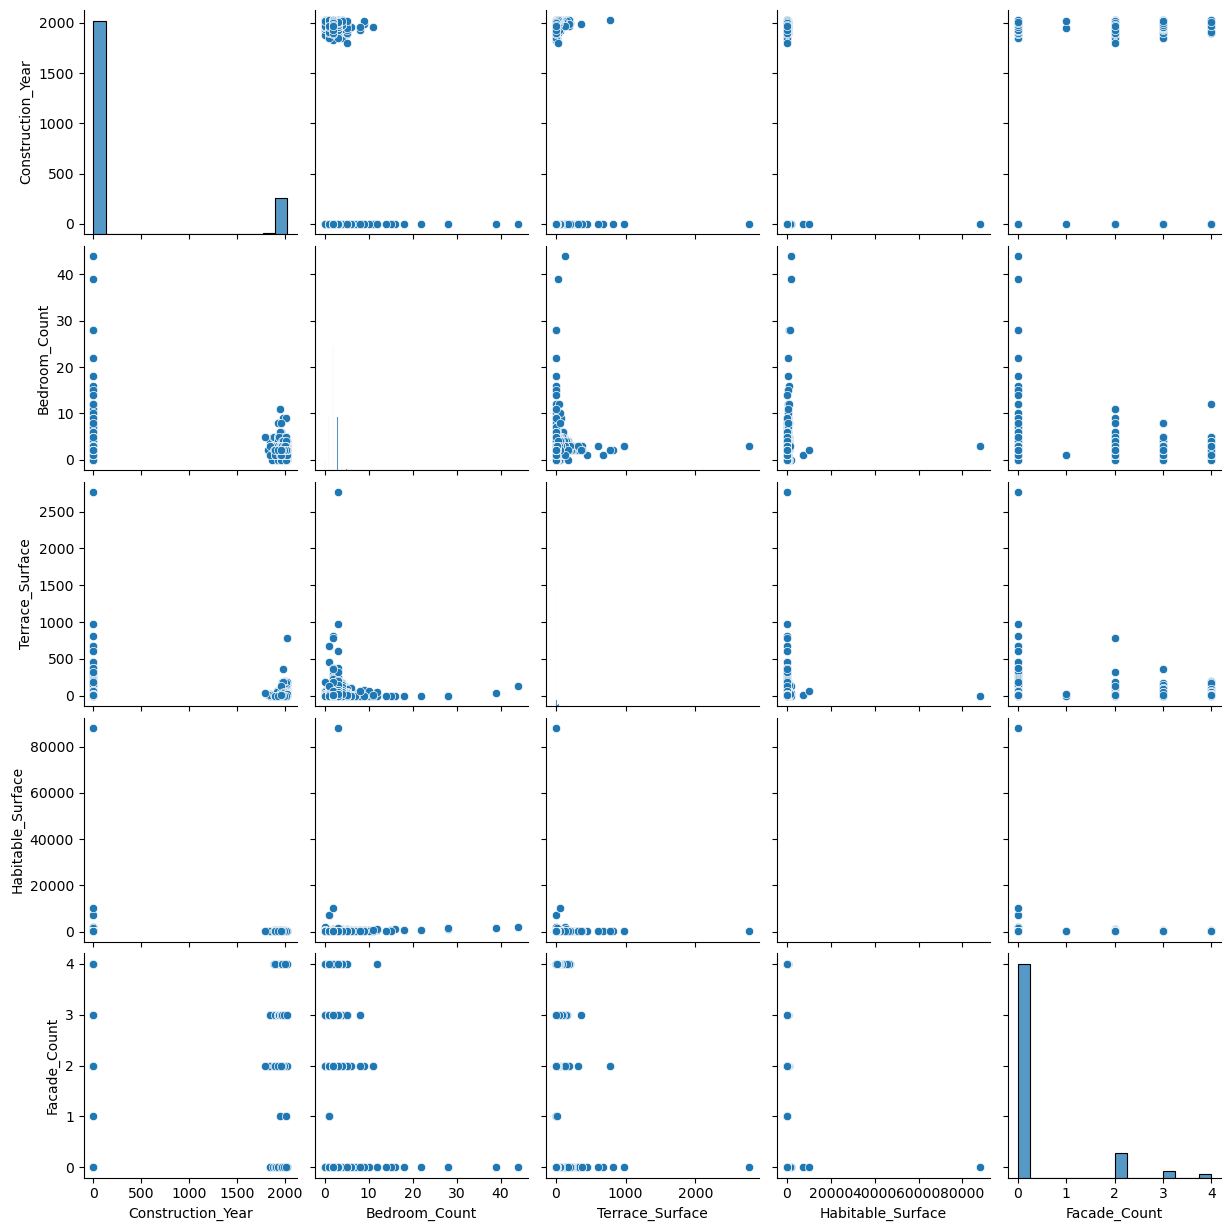

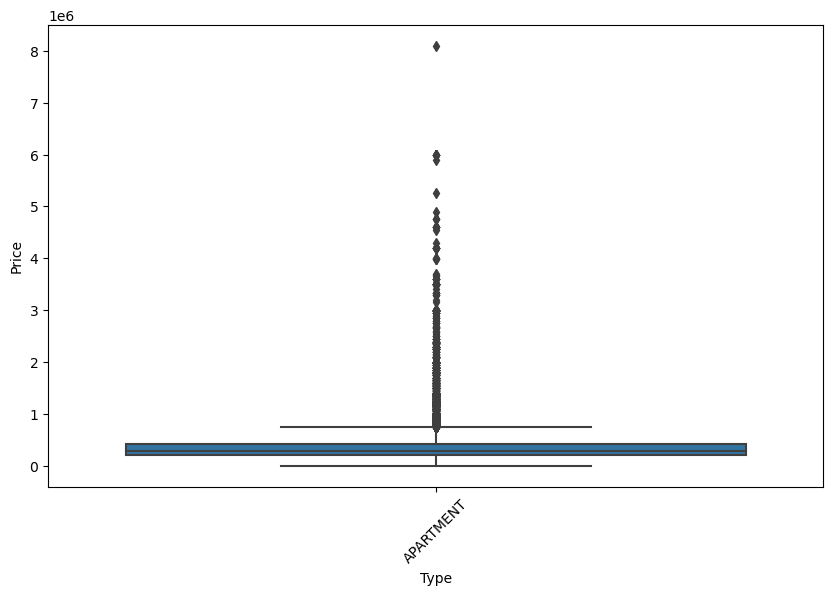

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize pairwise relationships
sns.pairplot(data_appr[[ 'Construction_Year', 'Bedroom_Count', 'Terrace_Surface', 'Habitable_Surface', 'Facade_Count']])
plt.show()

# Boxplot to visualize the distribution of 'Price' for different 'Type' of properties
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=data_appr)  # Corrected the parameter name 'datar' to 'data'
plt.xticks(rotation=45)
plt.show()


Barchart


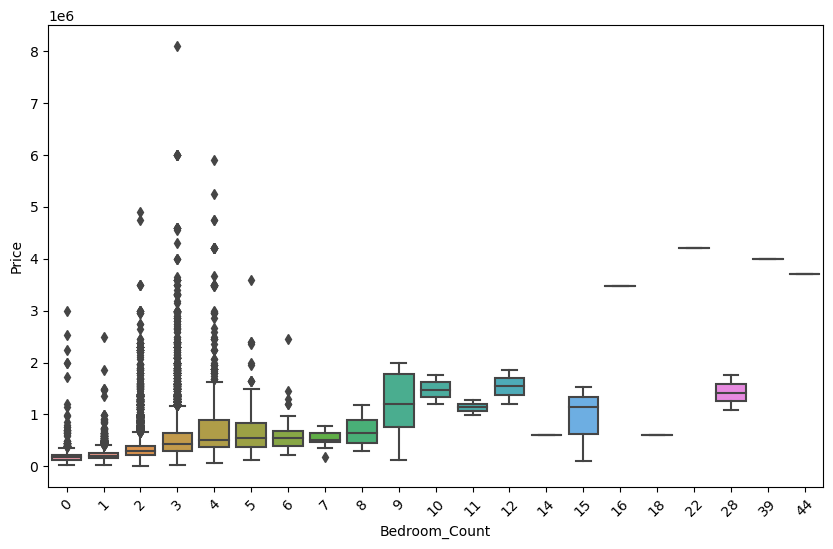

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedroom_Count', y='Price', data=data_appr)  # Corrected the parameter name 'datar' to 'data'
plt.xticks(rotation=45)
plt.show()


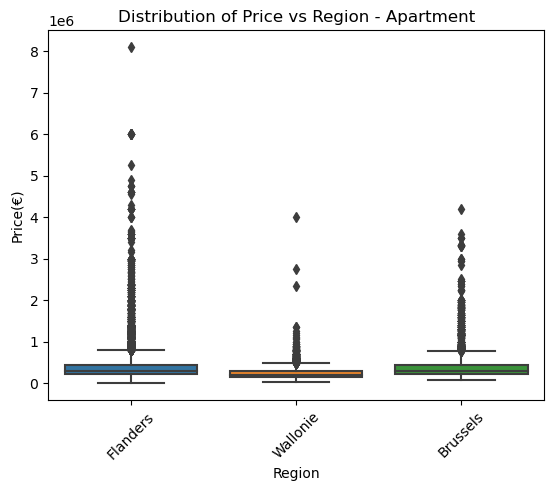

In [65]:
sns.boxplot(x='region', y='Price', data=data_appr)  # Corrected the parameter name 'datar' to 'data'
plt.title('Distribution of Price vs Region - Apartment')
plt.xlabel('Region')
plt.ylabel('Price(€)')
plt.xticks(rotation=45)
plt.show()

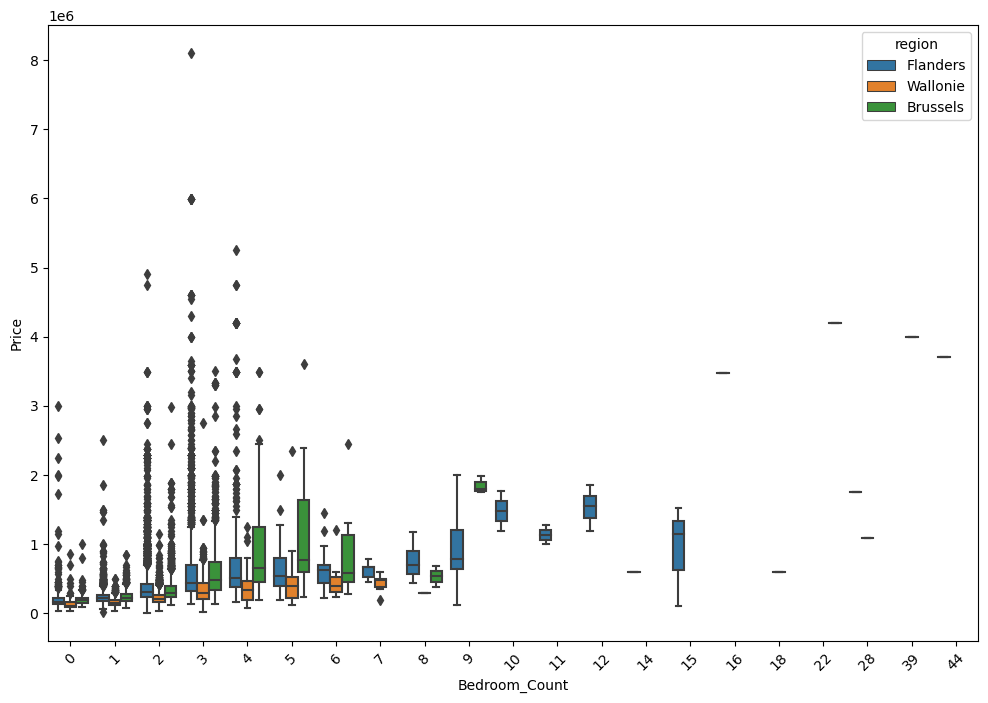

In [66]:

plt.figure(figsize=(12, 8)) 
# Assuming 'region' is a categorical variable that you want to use as hue
sns.boxplot(x='Bedroom_Count', y='Price', hue='region', data=data_appr)
plt.xticks(rotation=45)
plt.show()

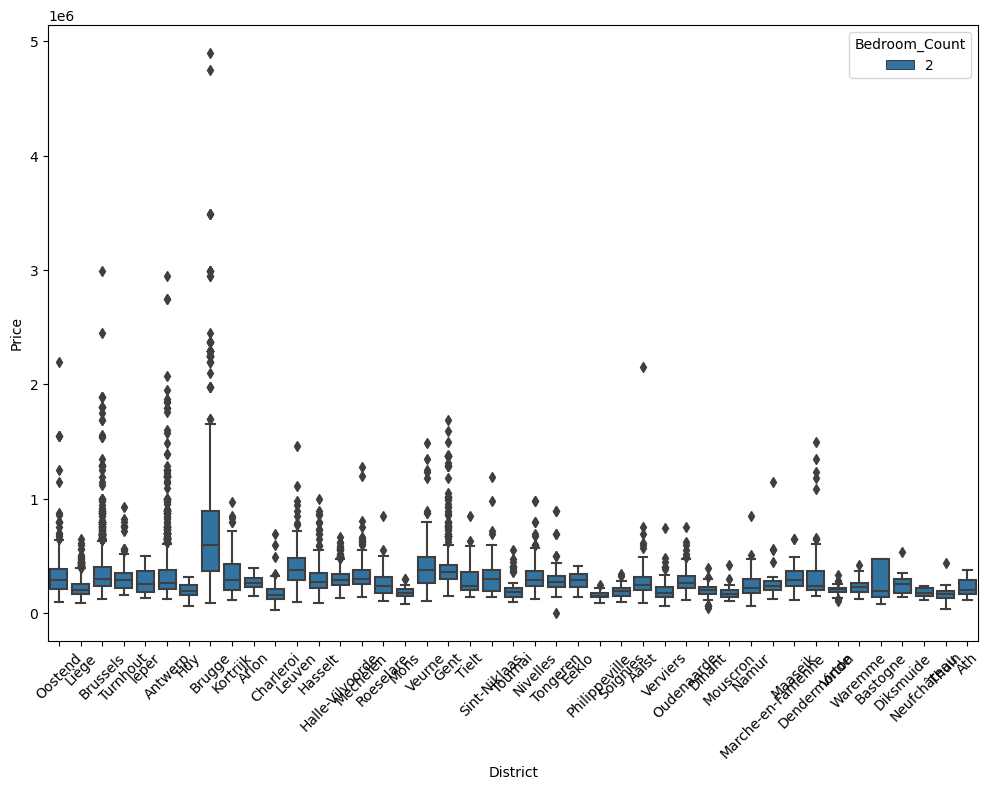

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8)) 

# Assuming 'provience' is a categorical variable that you want to use as hue
# 'Bedroom_Count' is filtered for the value 2
sns.boxplot(x='District', y='Price', hue='Bedroom_Count', data=data_appr[data_appr['Bedroom_Count'] == 2])
plt.xticks(rotation=45)
plt.show()


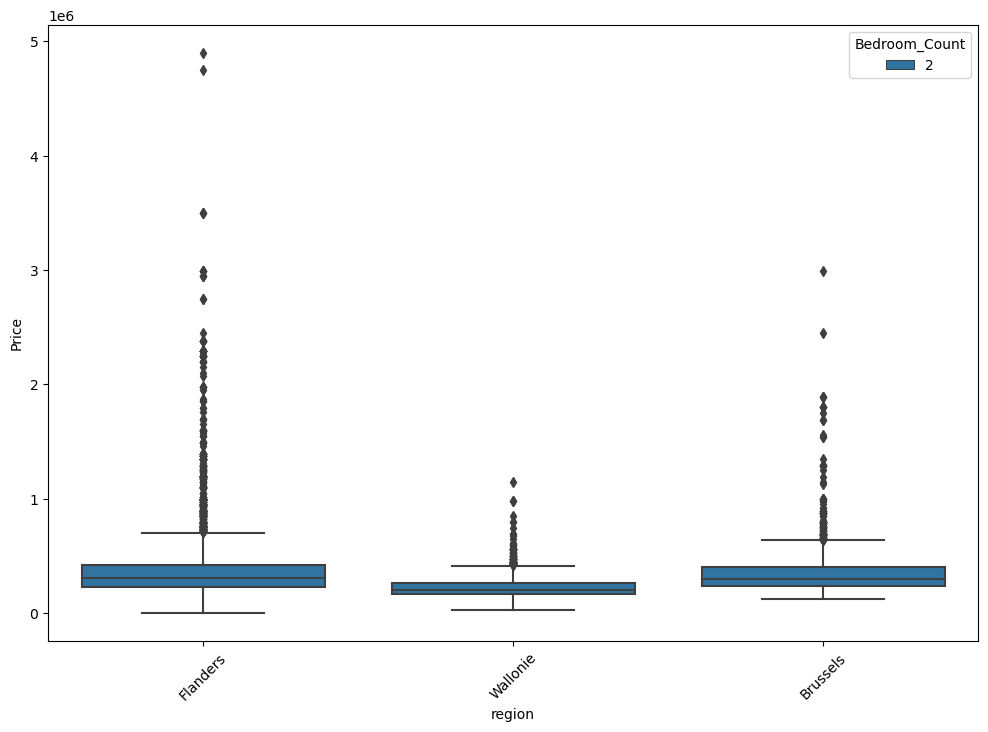

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8)) 

# Assuming 'provience' is a categorical variable that you want to use as hue
# 'Bedroom_Count' is filtered for the value 2
sns.boxplot(x='region', y='Price', hue='Bedroom_Count', data=data_appr[data_appr['Bedroom_Count'] == 2])
plt.xticks(rotation=45)
plt.show()

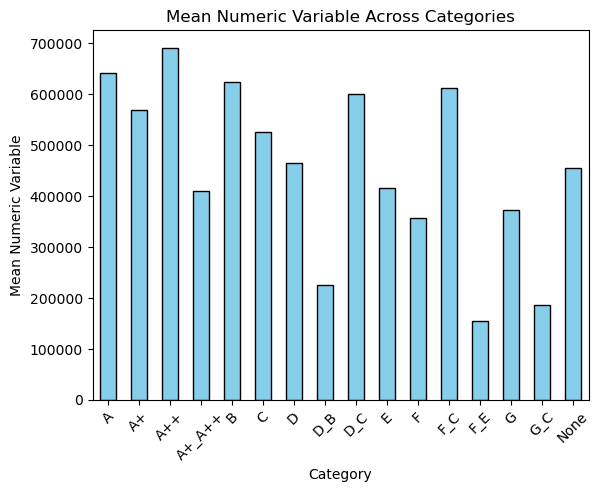

In [69]:
bar_data = data.groupby( 'EPC')['Price'].mean()  # Change 'mean' to 'median' if needed

bar_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Mean Numeric Variable')
plt.title('Mean Numeric Variable Across Categories')
plt.xticks(rotation=45)
plt.show()

c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


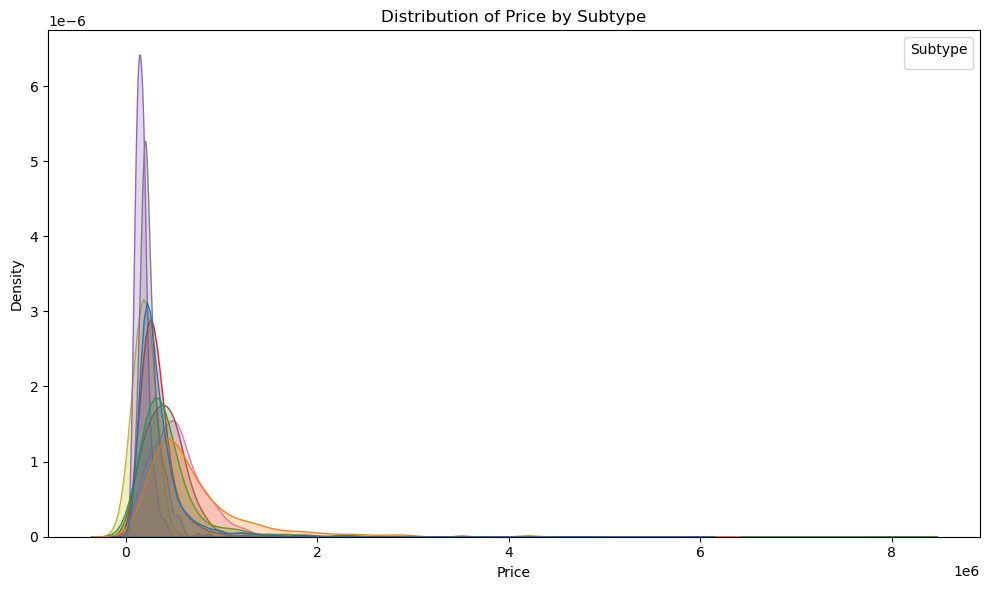

c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nithy\AppData\Local\Temp\ipykernel_19640\1654957026.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_appr, x='Price', hue=col, fill=True, common_norm=False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


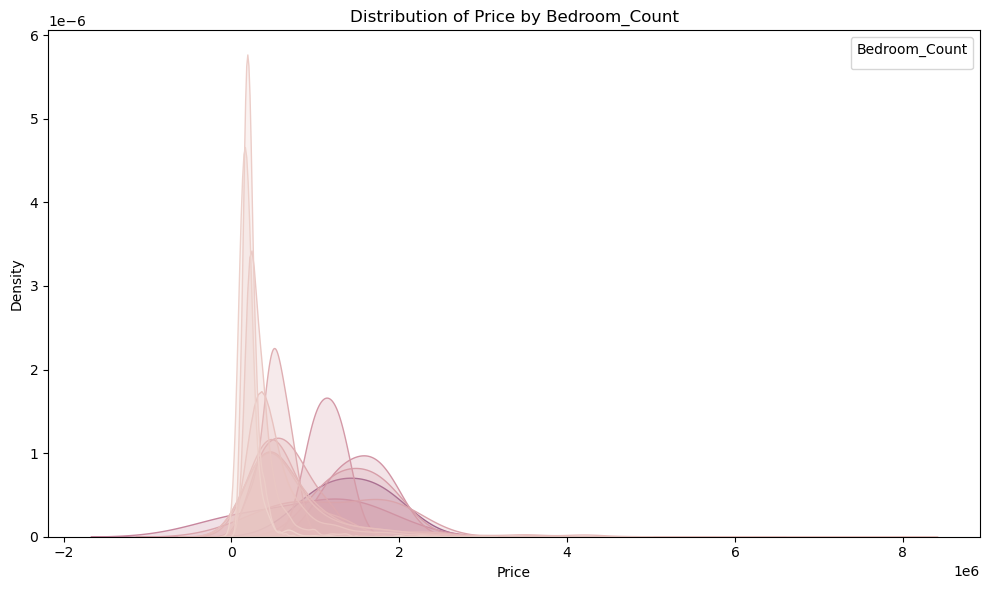

c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


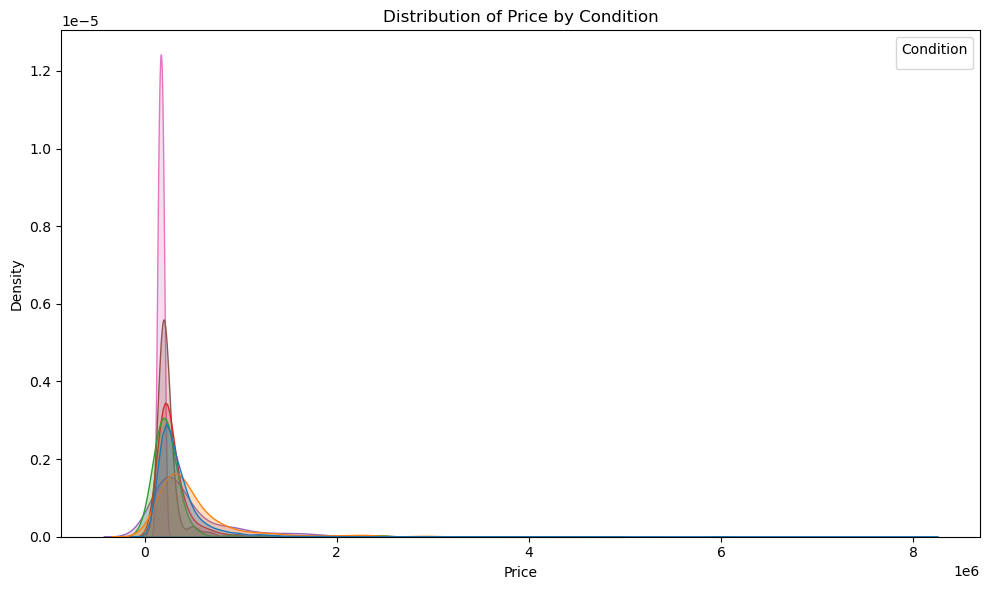

c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


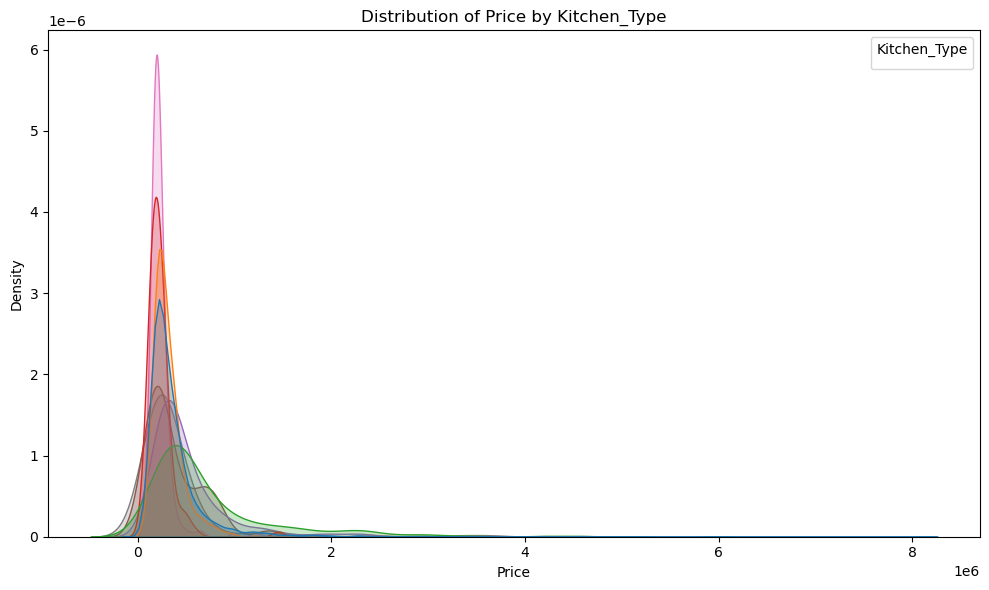

c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


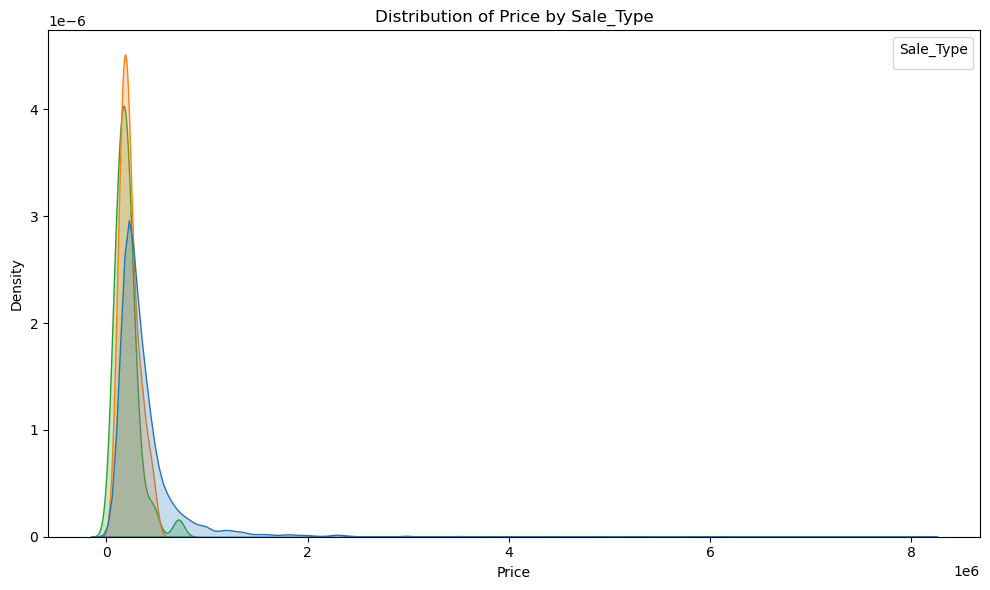

c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


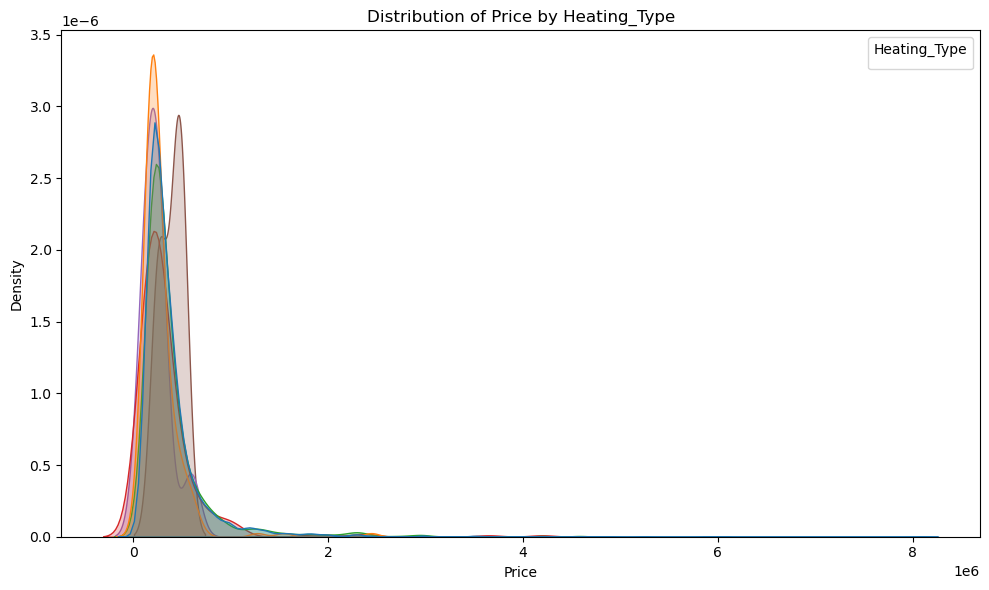

c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


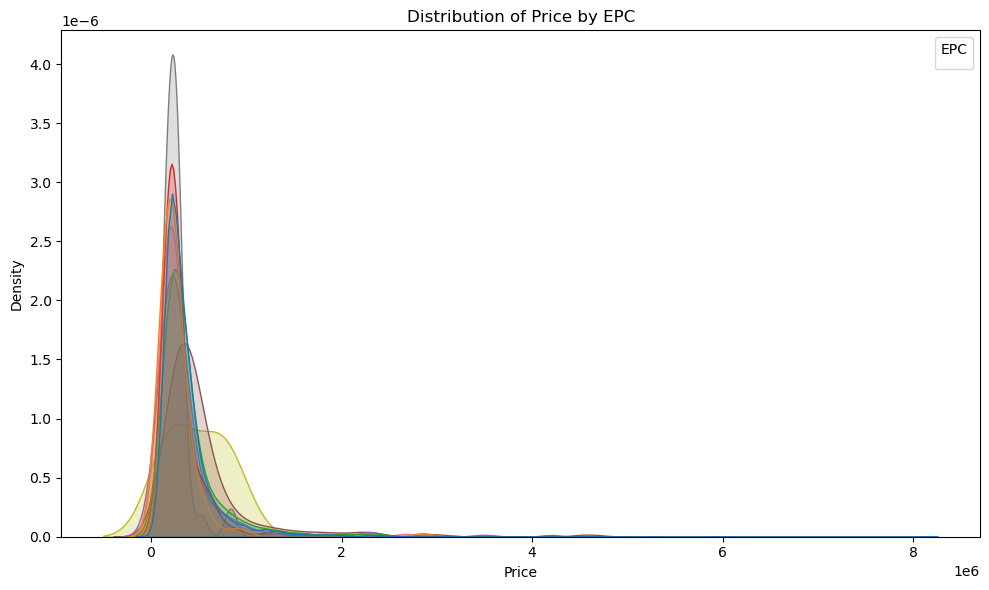

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of categorical columns
categorical_cols = ['Subtype', 'Bedroom_Count', 'Condition', 'Kitchen_Type', 'Sale_Type', 'Heating_Type', 'EPC']

# Create a DataFrame to store the average price for each category within each column
average_prices = pd.DataFrame(columns=categorical_cols)

# Calculate the average price for each category within each column
for col in categorical_cols:
    avg_price = data_appr.groupby(col)['Price'].mean().reset_index()
    avg_price.sort_values(by='Price', inplace=True)
    average_prices[col] = avg_price[col]

# Plot KDE plots for each categorical column, arranged by average price
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data_appr, x='Price', hue=col, fill=True, common_norm=False)
    plt.title(f'Distribution of Price by {col}')
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.legend(title=col)
    plt.tight_layout()
    plt.show()


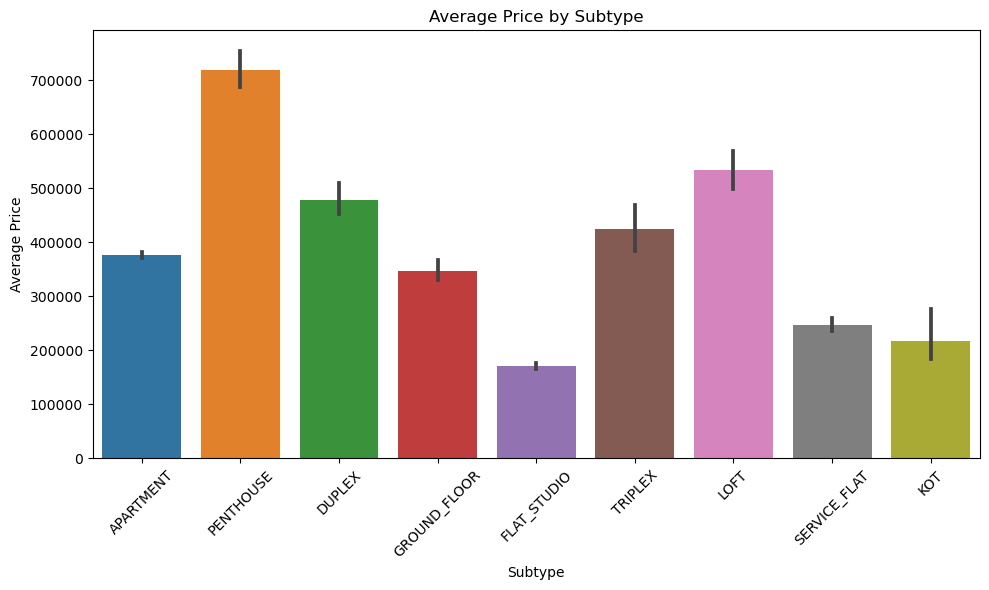

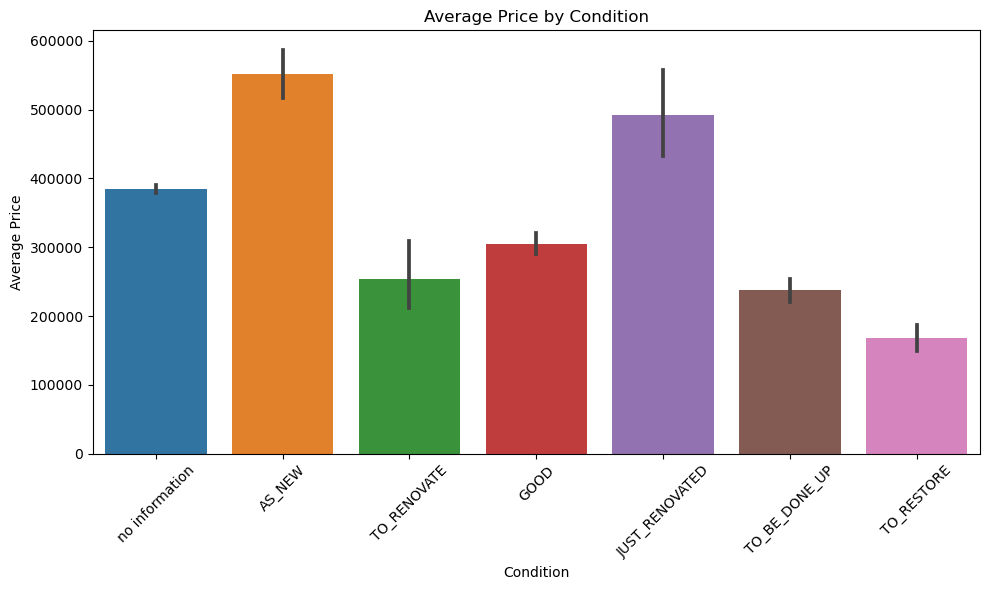

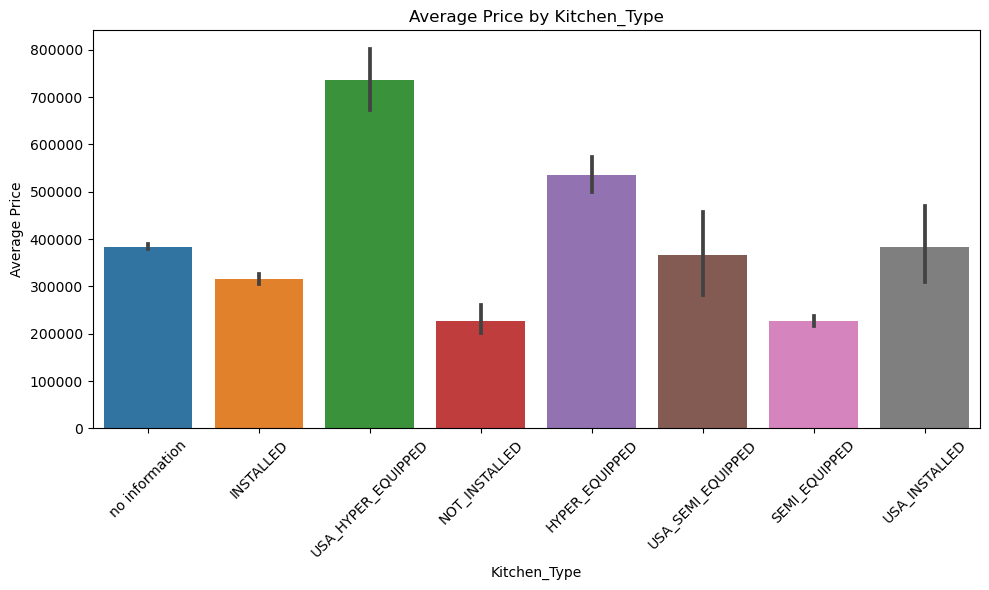

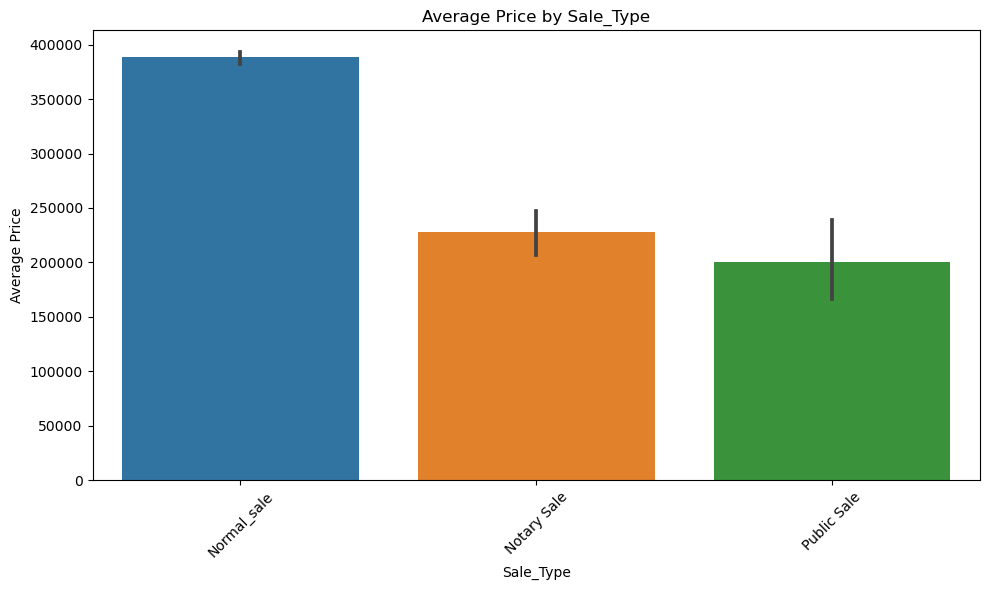

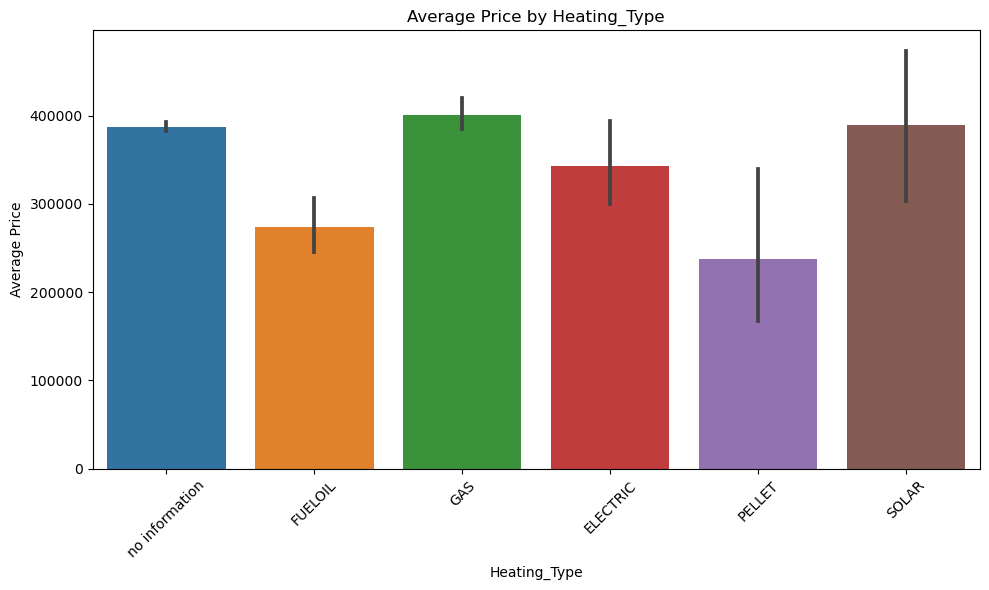

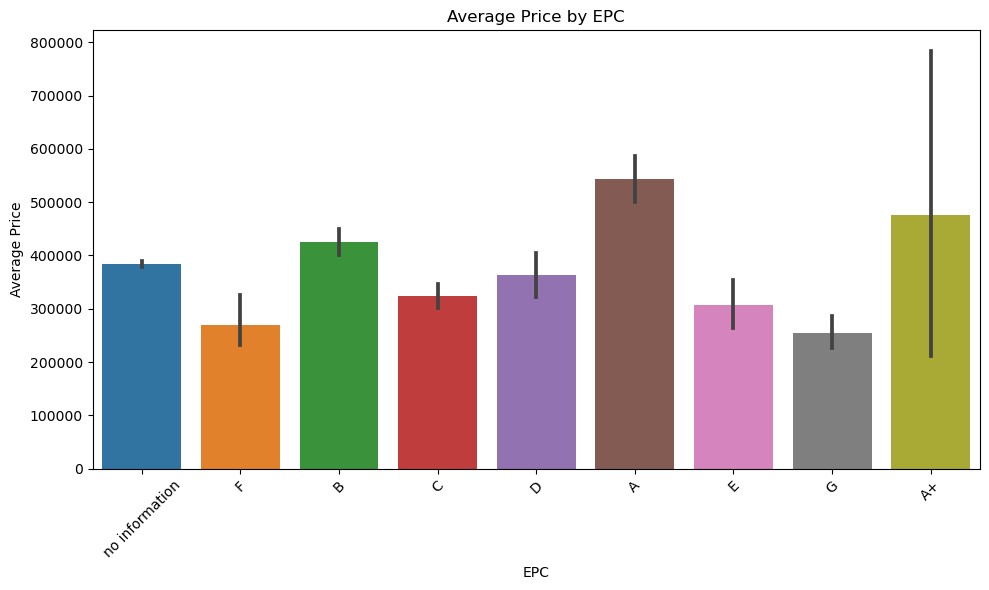

In [71]:

import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_cols = ['Subtype', 'Condition', 'Kitchen_Type', 'Sale_Type', 'Heating_Type',  'EPC']

# Plot bar plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='Price', data=data_appr)
    plt.title(f'Average Price by {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Average Price')
    plt.tight_layout()
    plt.show()

In [72]:
print(data_appr.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21756 entries, 0 to 21755
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        21756 non-null  int64  
 1   Price                     21756 non-null  int64  
 2   region                    21753 non-null  object 
 3   provience                 21753 non-null  object 
 4   District                  21753 non-null  object 
 5   Postal_Code               21756 non-null  int64  
 6   Locality                  21756 non-null  object 
 7   Latitude                  18014 non-null  float64
 8   Longitude                 18014 non-null  float64
 9   Construction_Year         21756 non-null  int64  
 10  Condition                 21756 non-null  object 
 11  Type                      21756 non-null  object 
 12  Subtype                   21756 non-null  object 
 13  Bedroom_Count             21756 non-null  int64  
 14  Kitche

In [73]:
data_appr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21756 entries, 0 to 21755
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        21756 non-null  int64  
 1   Price                     21756 non-null  int64  
 2   region                    21753 non-null  object 
 3   provience                 21753 non-null  object 
 4   District                  21753 non-null  object 
 5   Postal_Code               21756 non-null  int64  
 6   Locality                  21756 non-null  object 
 7   Latitude                  18014 non-null  float64
 8   Longitude                 18014 non-null  float64
 9   Construction_Year         21756 non-null  int64  
 10  Condition                 21756 non-null  object 
 11  Type                      21756 non-null  object 
 12  Subtype                   21756 non-null  object 
 13  Bedroom_Count             21756 non-null  int64  
 14  Kitche

In [74]:
data_appr = data_appr.drop(columns=['Latitude','Longitude','provience','District','Has_Terrace','Has_Garden'])

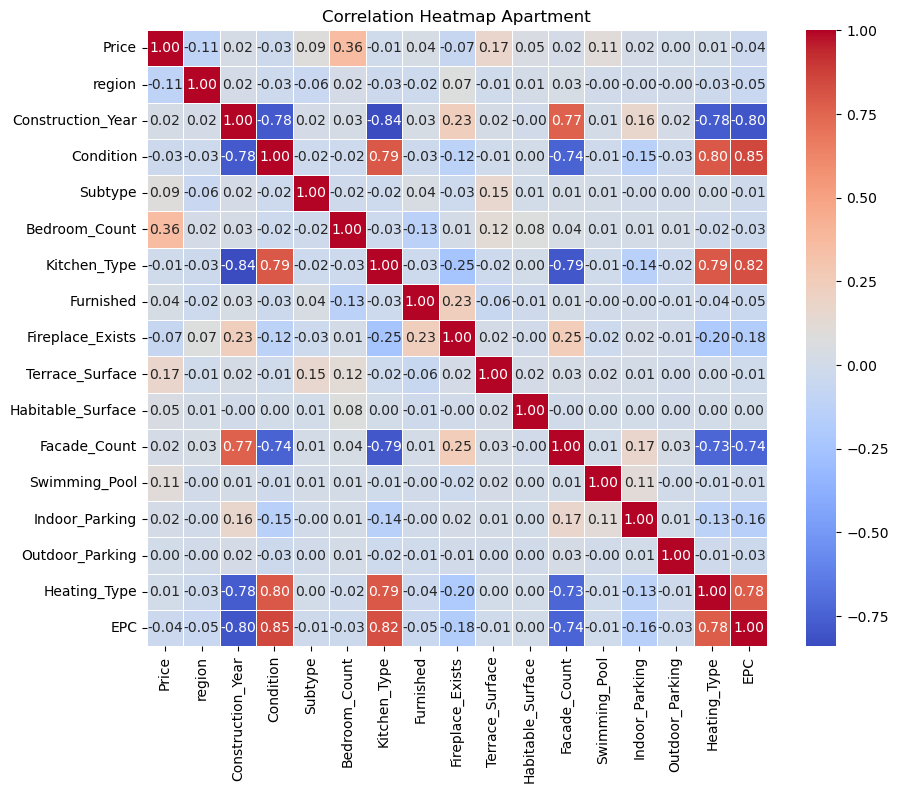

In [75]:
from sklearn.preprocessing import LabelEncoder

# Remove non-numeric columns
non_numeric_cols = ['ID', 'Postal_Code', 'Locality', 'Type','Energy_Consumption_Level','Sale_Type']
data_numeric = data_appr.drop(non_numeric_cols, axis=1)

# Convert boolean columns to 0 and 1
#boolean_cols = ['Double_glazing']  # Adjust as needed
#ata_numeric[boolean_cols] = data_numeric[boolean_cols].astype(int)

# Identify and handle boolean columns by converting them to strings
#boolean_cols = data_numeric.select_dtypes(include=bool).columns.tolist()
#for col in boolean_cols:
#    data_numeric[col] = data_numeric[col].astype(str)

# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
categorical_cols = data_numeric.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    data_numeric[col] = label_encoder.fit_transform(data_numeric[col])

# Calculate correlation matrix
corr = data_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Apartment')
plt.show()

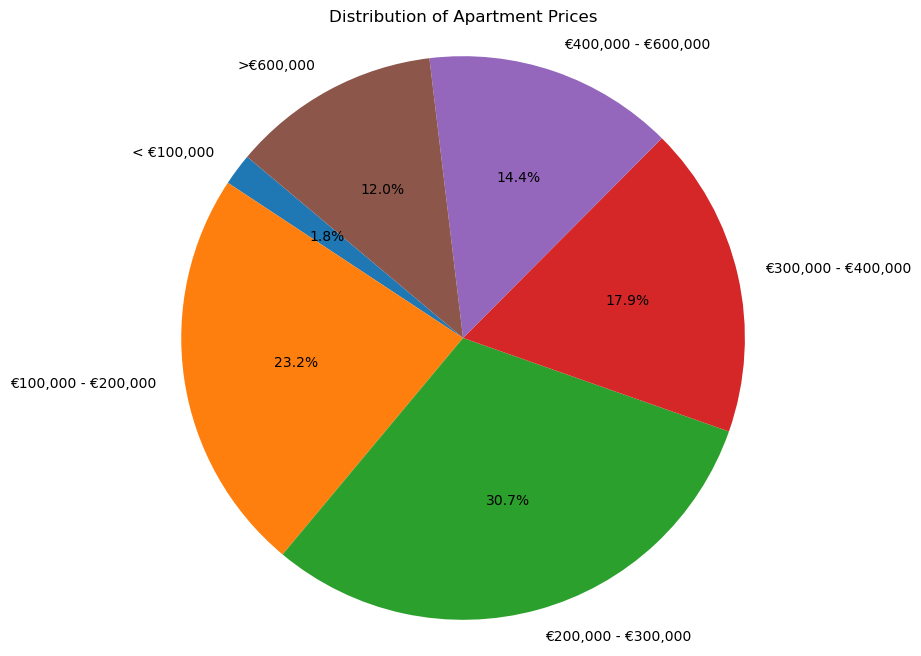

In [76]:
# Count the number of occurrences of each apartment type
# Define price ranges or categories
import matplotlib.pyplot as plt
price_ranges = ['< €100,000', '€100,000 - €200,000', '€200,000 - €300,000', '€300,000 - €400,000', '€400,000 - €600,000', '>€600,000']

# Count the number of apartments falling into each price range
price_counts = [
    sum(data_appr['Price'] < 100000),
    sum((data_appr['Price'] >= 100000) & (data_appr['Price'] < 200000)),
    sum((data_appr['Price'] >= 200000) & (data_appr['Price'] < 300000)),
    sum((data_appr['Price'] >= 300000) & (data_appr['Price'] < 400000)),
    sum((data_appr['Price'] >= 400000) & (data_appr['Price'] < 600000)),
    sum(data_appr['Price'] >= 600000)
]

# Plot pie chart for apartment prices
plt.figure(figsize=(8, 8))
plt.pie(price_counts, labels=price_ranges, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Apartment Prices')
plt.axis('equal')
plt.show()

Houses

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_house = pd.read_csv('immo_house_raw_vf.csv')
# Columns to fill with zero
columns_to_fill_zero = ['Has_Terrace', 'Has_Garden', 'Swimming_Pool', 'Indoor_Parking', 'Outdoor_Parking']
data_house[columns_to_fill_zero] = data_house[columns_to_fill_zero].fillna(0)

# Columns to fill with 'no information'
columns_to_fill_no_information = ['Condition', 'Kitchen_Type', 'Heating_Type', 'Energy_Consumption_Level', 'EPC', 'Double_glazing']
data_house[columns_to_fill_no_information] = data_house[columns_to_fill_no_information].fillna('no information')

# Fill 'Sale Type' with 'Normal_sale'
data_house['Sale_Type'] = data_house['Sale_Type'].fillna('Normal_sale')

# Drop specified columns permanently
#data_house.drop(['Cadastral_income','Double_glazing'], axis=1, inplace=True)
#data_appr['Double_glazing'] = data_appr['Double_glazing'].map({'True': 1, 'False': 0})

# Print the DataFrame after filling missing values
data_house.to_csv("immo_house_cleaned_vf.csv", index=False)


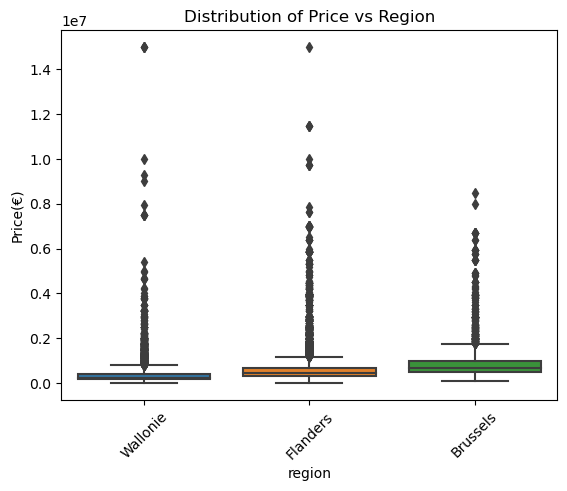

In [79]:
sns.boxplot(x='region', y='Price', data=data_house)  # Corrected the parameter name 'datar' to 'data'
plt.title('Distribution of Price vs Region')
plt.xlabel('region')
plt.ylabel('Price(€)')
plt.xticks(rotation=45)
plt.show()

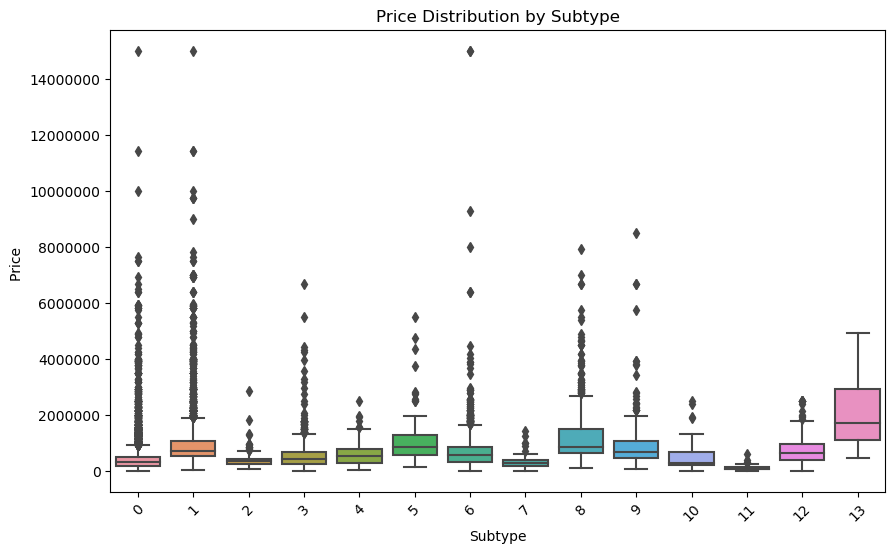

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a function to format tick labels
def currency_formatter(x, pos):
    return f'{x:.0f}'  # Display without decimal places

# Set the formatter for both x and y axes
formatter = FuncFormatter(currency_formatter)

# Plot the boxplot with labeled axes
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Subtype', y='Price', data=data_house)
ax.xaxis.set_major_formatter(formatter)  # Apply formatter to x-axis
ax.yaxis.set_major_formatter(formatter)  # Apply formatter to y-axis
plt.title('Price Distribution by Subtype')
plt.xlabel('Subtype')
plt.ylabel(f'Price ')
plt.xticks(rotation=45)
plt.show()


c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nithy\anaconda3\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

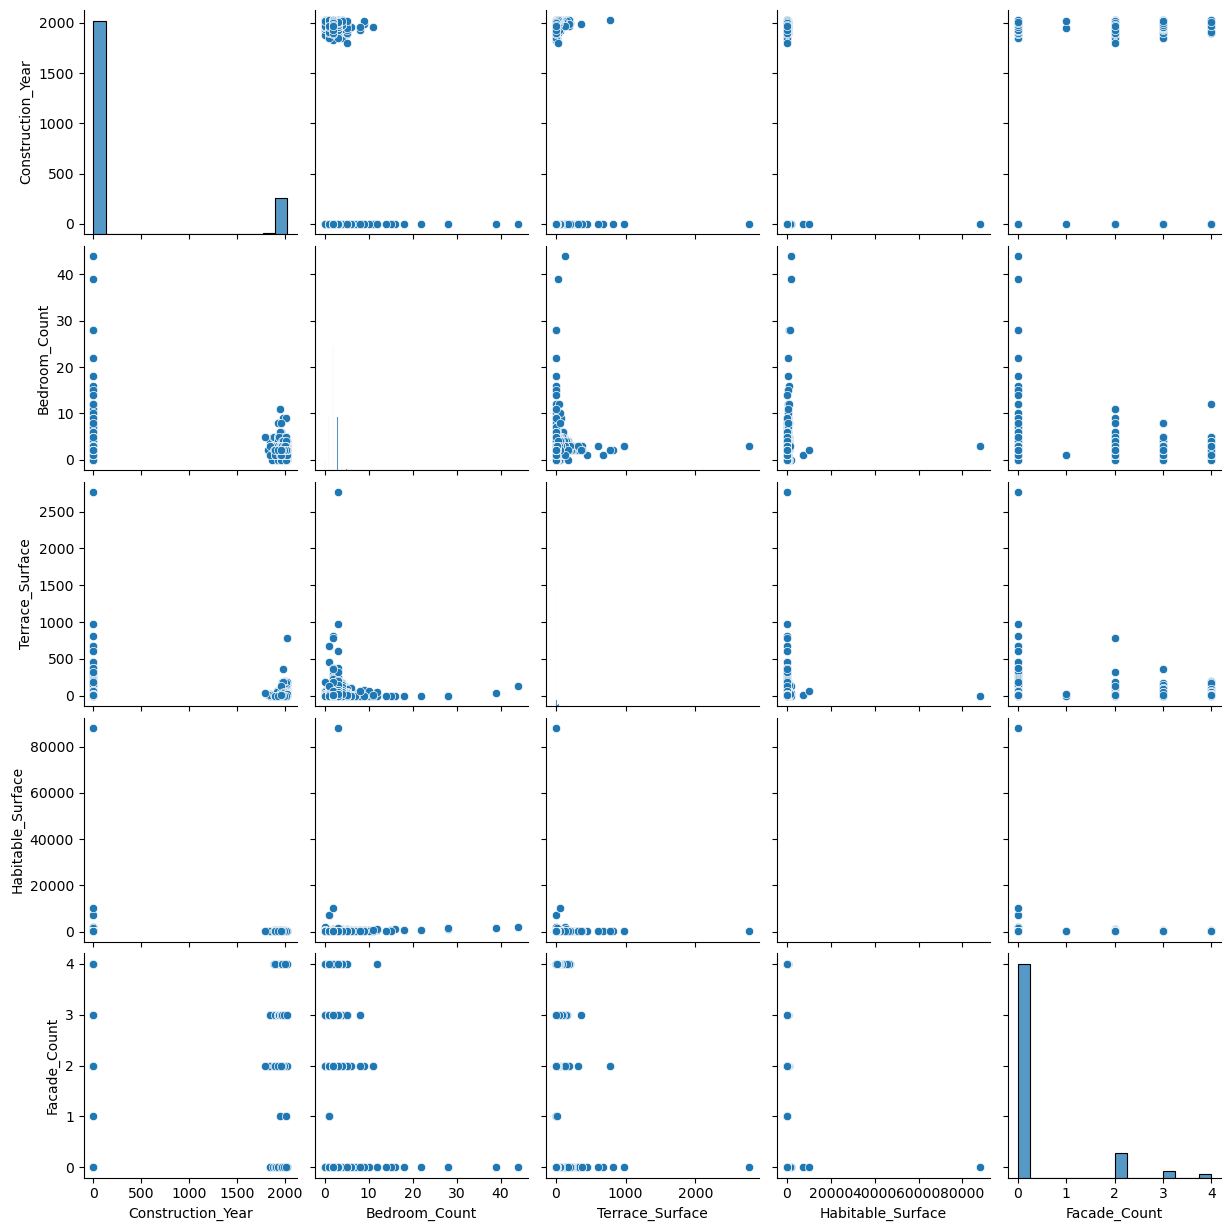

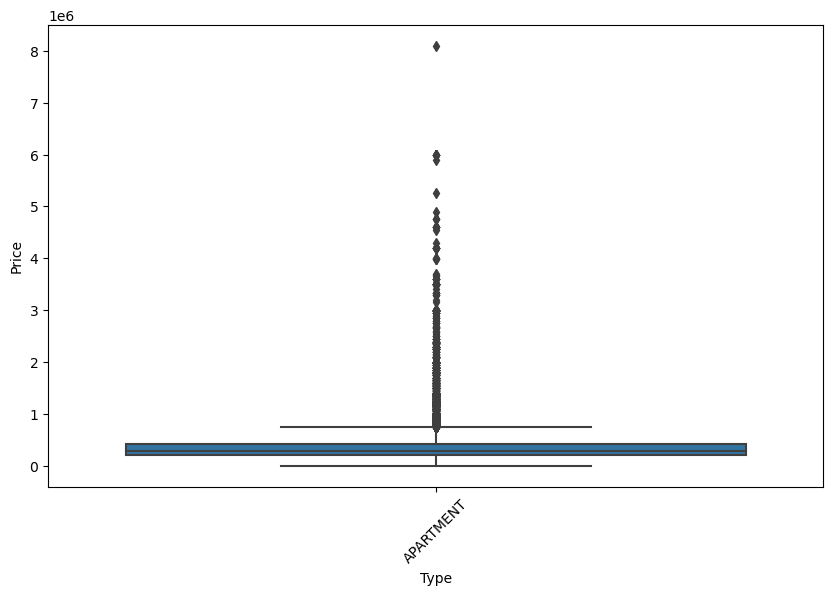

In [ ]:
sns.pairplot(data_appr[[ 'Construction_Year', 'Bedroom_Count', 'Terrace_Surface', 'Habitable_Surface', 'Facade_Count']])
plt.show()

# Boxplot to visualize the distribution of 'Price' for different 'Type' of properties
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=data_appr)  # Corrected the parameter name 'datar' to 'data'
plt.xticks(rotation=45)
plt.show()

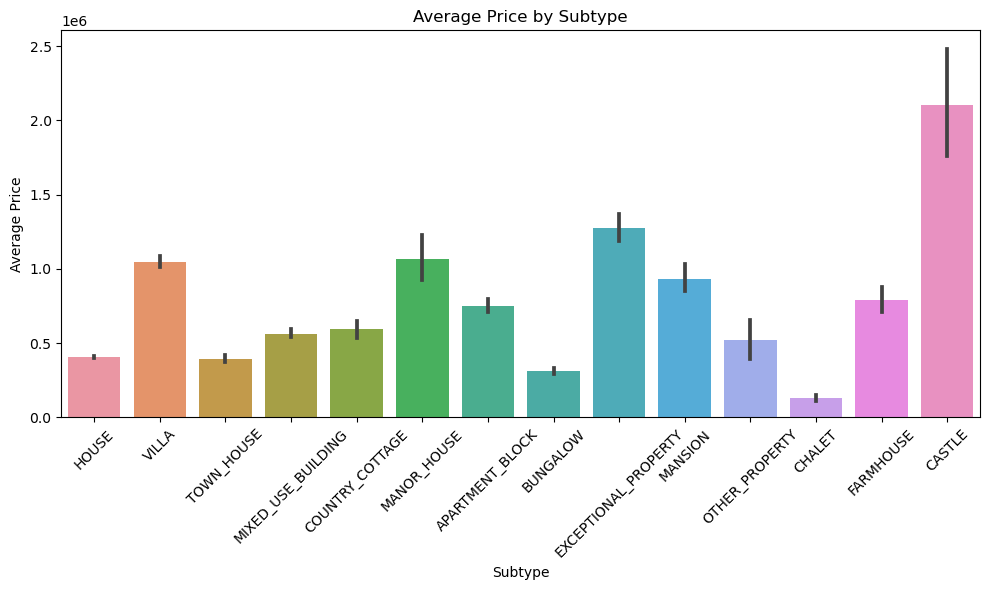

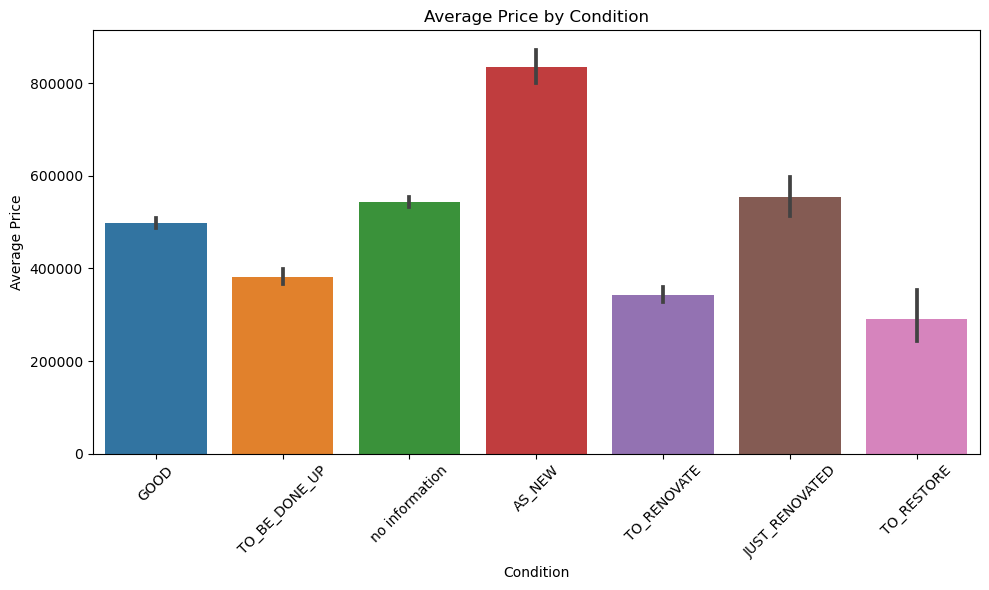

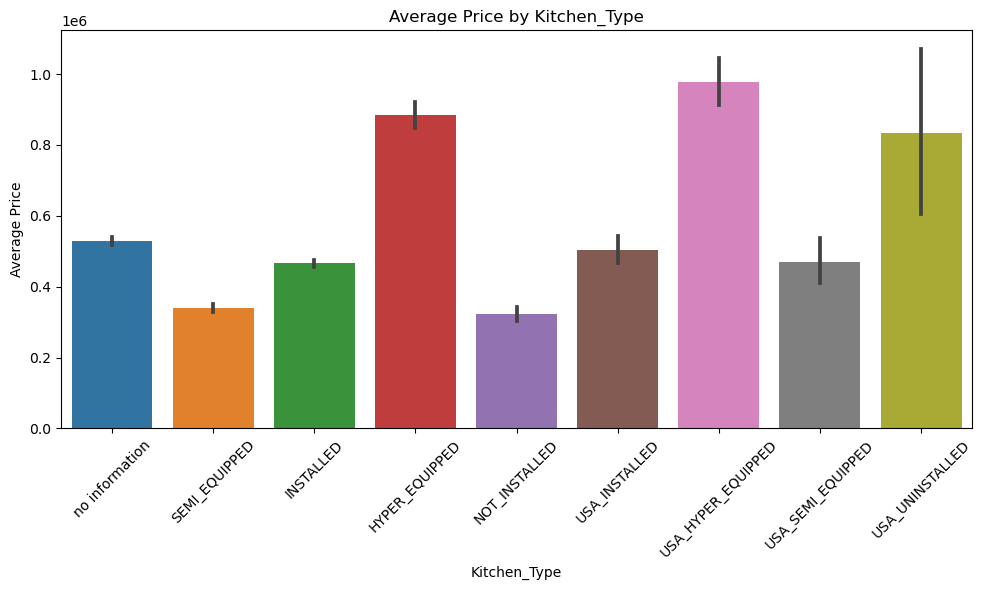

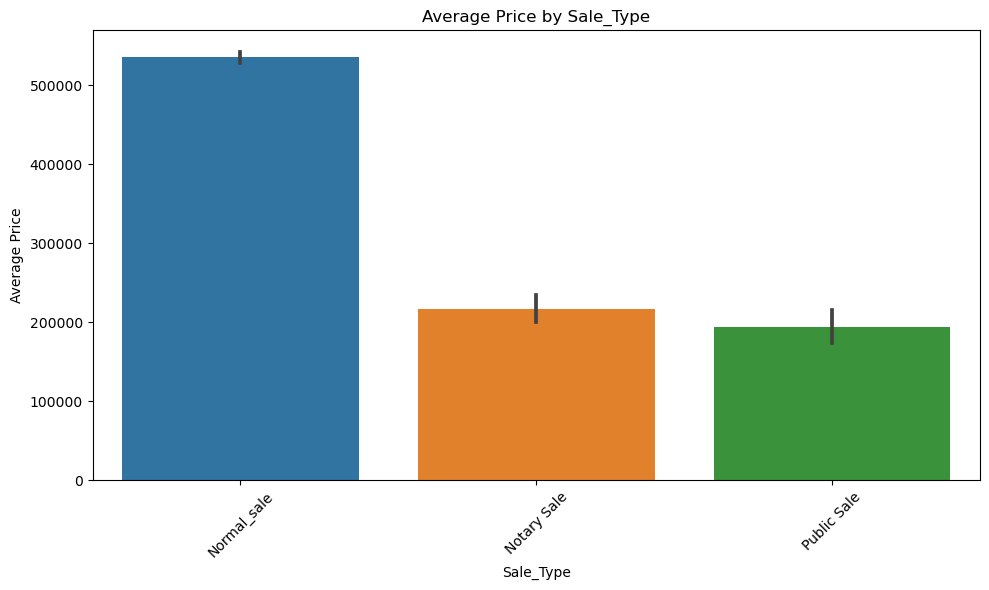

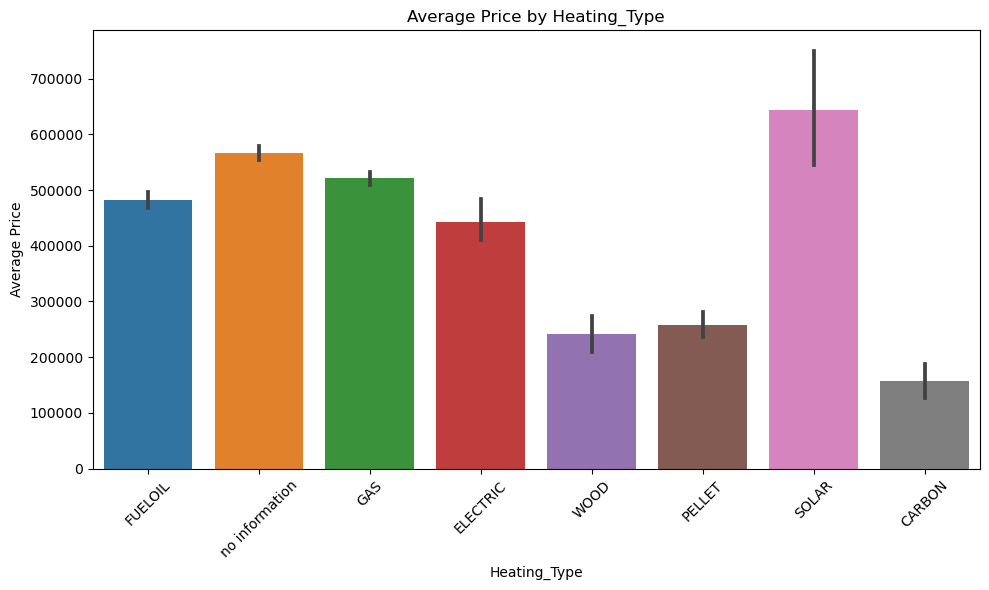

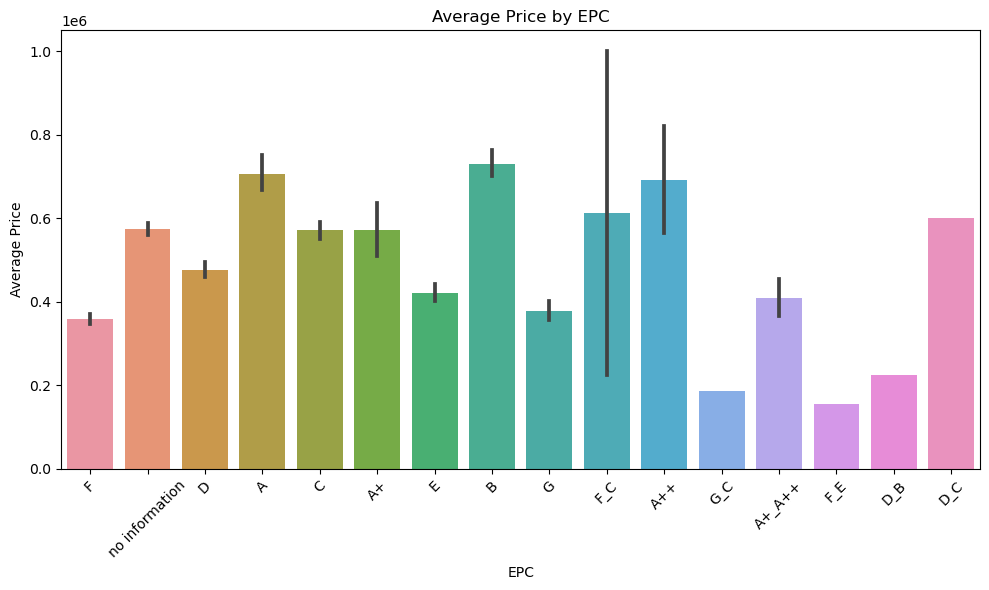

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_cols = ['Subtype', 'Condition', 'Kitchen_Type', 'Sale_Type', 'Heating_Type',  'EPC']

# Plot bar plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='Price', data=data_house)
    plt.title(f'Average Price by {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Average Price')
    plt.tight_layout()
    plt.show()

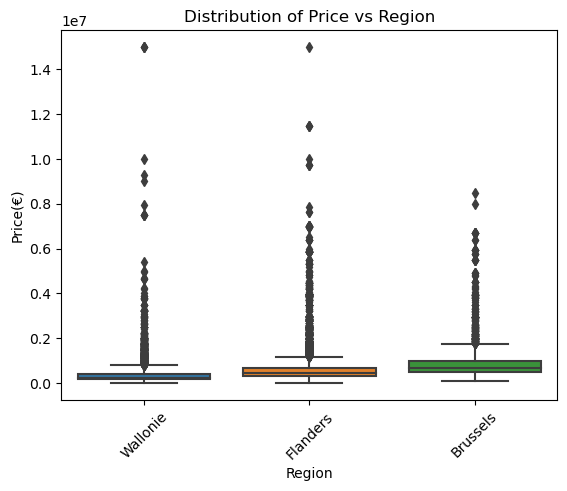

In [83]:
sns.boxplot(x='region', y='Price', data=data_house)  # Corrected the parameter name 'datar' to 'data'
plt.title('Distribution of Price vs Region')
plt.xlabel('Region')
plt.ylabel('Price(€)')
plt.xticks(rotation=45)
plt.show()

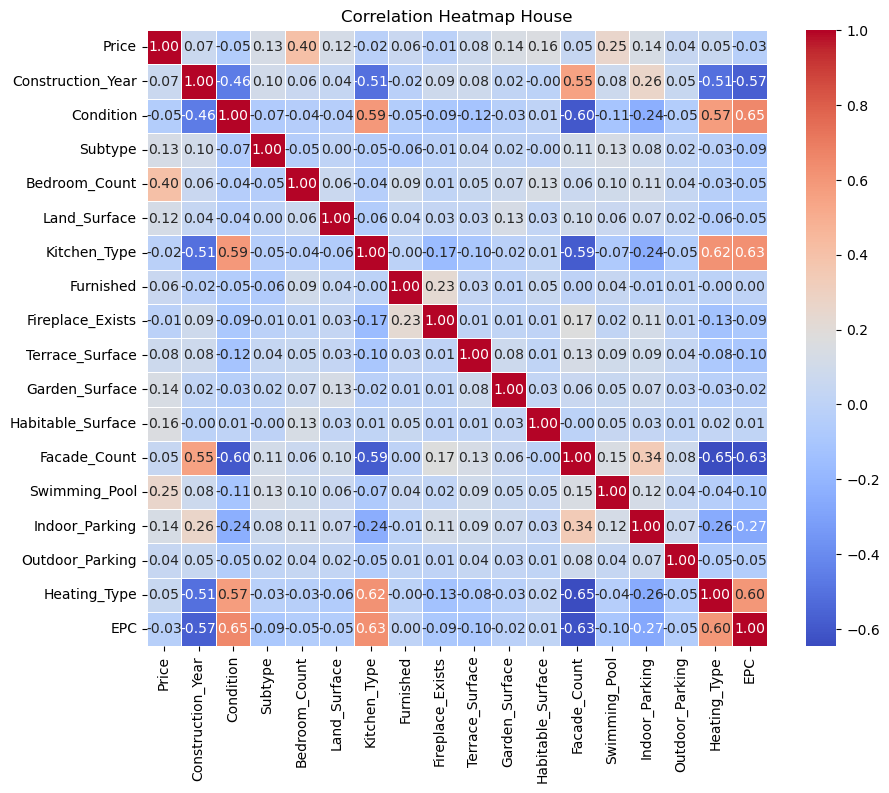

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Remove non-numeric columns
non_numeric_cols = ['ID', 'Postal_Code', 'Locality', 'Type','Energy_Consumption_Level','Sale_Type']
data_numeric = data_house.drop(non_numeric_cols, axis=1)

# Convert boolean columns to 0 and 1
#boolean_cols = ['Double_glazing']  # Adjust as needed
#ata_numeric[boolean_cols] = data_numeric[boolean_cols].astype(int)

# Identify and handle boolean columns by converting them to strings
#boolean_cols = data_numeric.select_dtypes(include=bool).columns.tolist()
#for col in boolean_cols:
#    data_numeric[col] = data_numeric[col].astype(str)

# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
categorical_cols = data_numeric.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    data_numeric[col] = label_encoder.fit_transform(data_numeric[col])

# Calculate correlation matrix
corr = data_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap House')
plt.show()


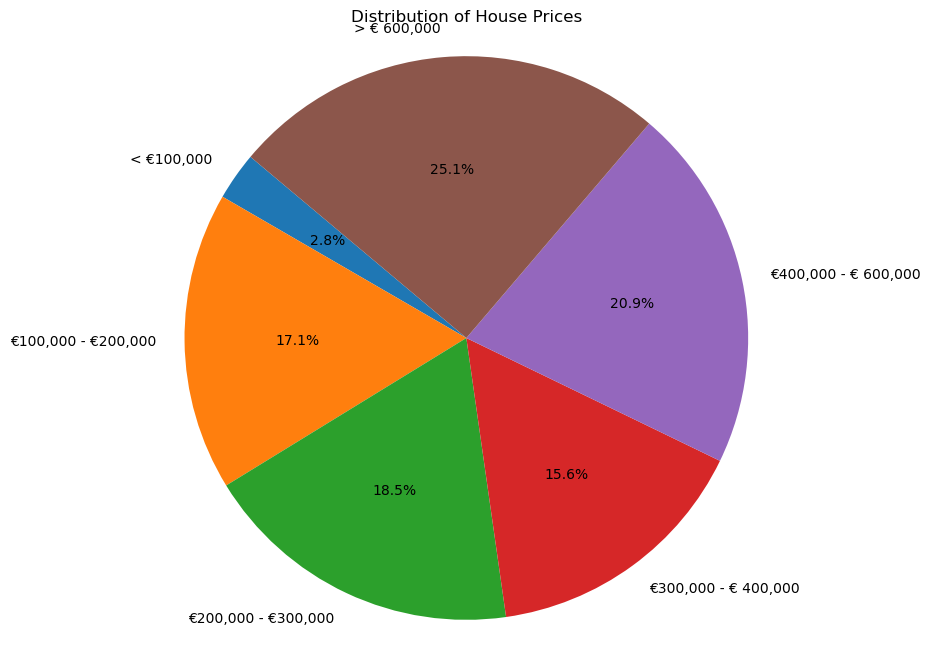

In [195]:
price_ranges = ['< €100,000', '€100,000 - €200,000', '€200,000 - €300,000', '€300,000 - € 400,000', '€400,000 - € 600,000','> € 600,000']

# Count the number of apartments falling into each price range
price_counts = [
    sum(data_house['Price'] < 100000),
    sum((data_house['Price'] >= 100000) & (data_house['Price'] < 200000)),
    sum((data_house['Price'] >= 200000) & (data_house['Price'] < 300000)),
    sum((data_house['Price'] >= 300000) & (data_house['Price'] < 400000)),
    sum((data_house['Price'] >= 400000) & (data_house['Price'] < 600000)),
    sum(data_house['Price'] >= 600000)
]

# Plot pie chart for apartment prices
plt.figure(figsize=(8, 8))
plt.pie(price_counts, labels=price_ranges, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of House Prices')
plt.axis('equal')
plt.show()

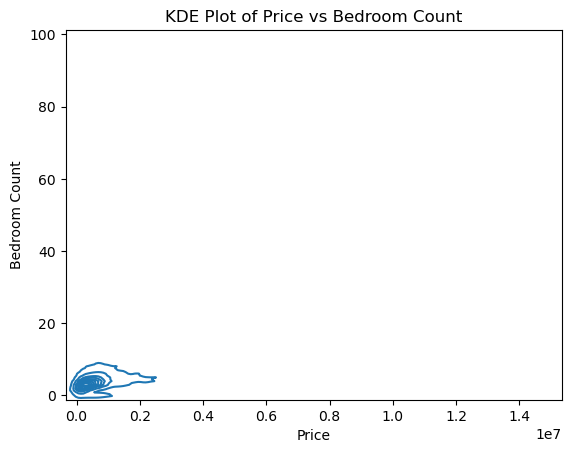

In [201]:
data = data_house[['Price', 'Bedroom Count']]

# Create KDE plot between 'Price' and 'Bedroom' columns
sns.kdeplot(data=data, x='Price', y='Bedroom Count')
plt.title('KDE Plot of Price vs Bedroom Count')
plt.xlabel('Price')
plt.ylabel('Bedroom Count')
plt.show()